In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial.distance import pdist, squareform

In [8]:
N = 1000

# Згенеруємо випадкові дані для прикладу
angl = np.random.rand(N, 1) * 2 * np.pi

X1 = 10 + 10 * np.sin(angl) * np.random.rand(N, 1)
Y1 = 25 + 10 * np.cos(angl) * np.random.rand(N, 1)

angl = np.random.rand(N, 1) * 2 * np.pi

X2 = 3 + 10 * np.sin(angl) * np.random.rand(N, 1)
Y2 = 0 + 8 * np.cos(angl) * np.random.rand(N, 1)

angl = np.random.rand(N, 1) * 2 * np.pi

X3 = 20 + 10 * np.sin(angl) * np.random.rand(N, 1)
Y3 = -15 + 10 * np.cos(angl) * np.random.rand(N, 1)

X = np.concatenate((X1, X2, X3))
Y = np.concatenate((Y1, Y2, Y3))


In [9]:
def plot(M, K):
    
    plt.scatter(M[:,0], M[:,1], color = 'black')
    
    for i in range(K.max()):
        l = K == i
        plt.scatter(M[:,0] * l , M[:,1] * l)
    plt.scatter([0] , [0], color ='white')
    plt.show()

In [10]:
class DBSCAN:
    def __init__(self, eps=1, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        self.X = X
        self.visited = np.zeros(X.shape[0], dtype=bool)
        self.labels = np.zeros(X.shape[0], dtype=int)
        self.n_clusters = 0

        # Calculate pairwise distances
        self.D = squareform(pdist(X))

        # Loop through all points
        for i in range(X.shape[0]):
            if not self.visited[i]:
                self.visited[i] = True

                # Get neighbors
                neighbors = np.where(self.D[i] < self.eps)[0]

                if len(neighbors) < self.min_samples:
                    self.labels[i] = -1 #outsider
                else:
                    self.n_clusters += 1
                    self.labels[i] = self.n_clusters
                    self.expand_cluster(i, neighbors)

        return self.labels

    def expand_cluster(self, i, neighbors):
        # Add neighbors to cluster
        for j in neighbors:
            if not self.visited[j]:
                self.visited[j] = True
                new_neighbors = np.where( self.D[j] < self.eps)[0]
                if len(new_neighbors) >= self.min_samples:
                    neighbors = np.union1d(neighbors, new_neighbors)
            if self.labels[j] == 0:
                self.labels[j] = self.n_clusters

In [11]:
M = np.asarray([X,Y]).T.reshape(3 * N,2)

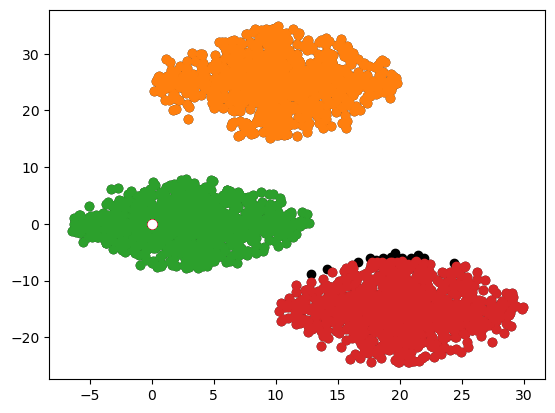

In [12]:
m = 4
eps = 13
db = DBSCAN(eps, m)
K = db.fit(M)
plot(M, K)